In [107]:
# 0 = No
# 1 = Yes

In [108]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score

from sklearn import preprocessing

In [109]:
data = pd.read_csv('PCOS_Final_Data.csv')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              541 non-null    int64  
 1   Sl. No                  541 non-null    int64  
 2   Patient File No.        541 non-null    int64  
 3   PCOS (Y/N)              541 non-null    int64  
 4    Age (yrs)              541 non-null    int64  
 5   Weight (Kg)             541 non-null    float64
 6   Height(Cm)              541 non-null    float64
 7   BMI                     541 non-null    float64
 8   Blood Group             541 non-null    int64  
 9   Pulse rate(bpm)         541 non-null    int64  
 10  RR (breaths/min)        541 non-null    int64  
 11  Hb(g/dl)                541 non-null    float64
 12  Cycle(R/I)              541 non-null    int64  
 13  Cycle length(days)      541 non-null    int64  
 14  Marraige Status (Yrs)   541 non-null    fl

In [111]:
#There is a column without name,So, first naming it.
data = data.rename(columns={'Unnamed: 0': 'index'})

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   541 non-null    int64  
 1   Sl. No                  541 non-null    int64  
 2   Patient File No.        541 non-null    int64  
 3   PCOS (Y/N)              541 non-null    int64  
 4    Age (yrs)              541 non-null    int64  
 5   Weight (Kg)             541 non-null    float64
 6   Height(Cm)              541 non-null    float64
 7   BMI                     541 non-null    float64
 8   Blood Group             541 non-null    int64  
 9   Pulse rate(bpm)         541 non-null    int64  
 10  RR (breaths/min)        541 non-null    int64  
 11  Hb(g/dl)                541 non-null    float64
 12  Cycle(R/I)              541 non-null    int64  
 13  Cycle length(days)      541 non-null    int64  
 14  Marraige Status (Yrs)   541 non-null    fl

In [113]:
#Droping the columns which are not related to the output
data = data.drop(['index','Sl. No','Patient File No.'],axis=1)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   541 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14  FSH(mIU/mL)             541 non-null    fl

In [115]:
# Separate the features (X) and the target variable (y)
x = data.drop(columns='PCOS (Y/N)')  
y = data['PCOS (Y/N)']  

# Applying Mutual info for finding better features from the dataset

In [116]:
# Compute mutual information between each feature and the target variable
mutual_info = mutual_info_classif(x,y)

In [117]:
# Create a DataFrame to store feature names and their corresponding mutual information scores
mi_scores = pd.Series(mutual_info, index=x.columns).sort_values(ascending=False)

# Print the mutual information scores for each feature
mi_scores

Follicle No. (R)          0.222598
Follicle No. (L)          0.181507
Weight gain(Y/N)          0.098684
hair growth(Y/N)          0.096402
Skin darkening (Y/N)      0.087025
Fast food (Y/N)           0.083927
Waist:Hip Ratio           0.076196
Cycle length(days)        0.067480
FSH/LH                    0.065468
AMH(ng/mL)                0.062880
PRL(ng/mL)                0.062439
Cycle(R/I)                0.059915
Pimples(Y/N)              0.057654
Weight (Kg)               0.045448
TSH (mIU/L)               0.037833
Pregnant(Y/N)             0.034569
FSH(mIU/mL)               0.034002
Waist(inch)               0.032362
LH(mIU/mL)                0.031217
Endometrium (mm)          0.031035
 Age (yrs)                0.029011
Pulse rate(bpm)           0.023043
Avg. F size (L) (mm)      0.022269
Hair loss(Y/N)            0.021355
BMI                       0.018322
Vit D3 (ng/mL)            0.013763
Hip(inch)                 0.012686
Marraige Status (Yrs)     0.009332
RR (breaths/min)    

In [118]:
top_10_features = mi_scores.index[:12]
X = x[top_10_features]
X['PCOS (Y/N)'] = y

C:\Users\ashik\AppData\Local\Temp\ipykernel_8008\3412163528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PCOS (Y/N)'] = y


In [119]:
X.head()

,Follicle No. (R),Follicle No. (L),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Fast food (Y/N),Waist:Hip Ratio,Cycle length(days),FSH/LH,AMH(ng/mL),PRL(ng/mL),Cycle(R/I),PCOS (Y/N)
0,3,3,0,0,0,1,0.833333,5,2.160326,2.07,45.16,2,0
1,5,3,0,0,0,0,0.842105,5,6.174312,1.53,20.09,2,0
2,15,13,0,0,0,1,0.900000,5,6.295455,6.63,10.52,2,1
3,2,2,0,0,0,0,0.857143,5,3.415254,1.22,36.90,2,0
4,4,3,0,0,0,0,0.810811,5,4.422222,2.26,30.09,2,0


In [120]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_part, test_part in split.split(X, X[['PCOS (Y/N)']]):
    train_set = data.loc[train_part]
    test_set = data.loc[test_part]

In [121]:
X_train = train_set.drop(columns='PCOS (Y/N)')  
y_train = train_set['PCOS (Y/N)'] 
X_test = test_set.drop(columns='PCOS (Y/N)')
y_test = test_set['PCOS (Y/N)']

In [122]:
# Standard Scaler applying for better prediction
x_train = preprocessing.StandardScaler().fit_transform(X_train)
x_test = preprocessing.StandardScaler().fit_transform(X_test)

# Applying Machine Learning Models

In [123]:
model1 = LogisticRegression(random_state=0)

model1.fit(X_train, y_train)


y_pred = model1.predict(X_test)


LogisticRegression = accuracy_score(y_test, y_pred)
print("Accuracy:", LogisticRegression)

Accuracy: 0.8348623853211009


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [124]:
model2 = GaussianNB()


model2.fit(X_train, y_train)


y_pred = model2.predict(X_test)


GaussianNB = accuracy_score(y_test, y_pred)
print("Accuracy:", GaussianNB*100)

Accuracy: 83.4862385321101


In [125]:
model3 = DecisionTreeClassifier()


model3.fit(X_train, y_train)


y_pred = model3.predict(X_test)


DecisionTreeClassifier = accuracy_score(y_test, y_pred)
print("Accuracy:", DecisionTreeClassifier*100)

Accuracy: 75.22935779816514


In [126]:
model4 = RandomForestClassifier()


model4.fit(X_train, y_train)


y_pred = model4.predict(X_test)


RandomForestClassifier = accuracy_score(y_test, y_pred)
print("Accuracy:", RandomForestClassifier*100)

Accuracy: 88.9908256880734


In [127]:
model5 = SVC()


model5.fit(X_train, y_train)


y_pred = model5.predict(X_test)


SVC = accuracy_score(y_test, y_pred*100)
print("Accuracy:", SVC)

Accuracy: 0.6697247706422018


In [128]:
model5 = MultinomialNB()


model5.fit(X_train, y_train)


y_pred = model5.predict(X_test)


MultinomialNB = accuracy_score(y_test, y_pred*100)
print("Accuracy:", MultinomialNB)

Accuracy: 0.5229357798165137


In [129]:
model5 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)


model5.fit(X_train, y_train)


y_pred = model5.predict(X_test)


MLPClassifier = accuracy_score(y_test, y_pred*100)
print("Accuracy:", MLPClassifier)

Accuracy: 0.6146788990825688


In [130]:
model5 = LinearSVC()


model5.fit(X_train, y_train)


y_pred = model5.predict(X_test)


LinearSVC = accuracy_score(y_test, y_pred*100)
print("Accuracy:", LinearSVC)

Accuracy: 0.45871559633027525


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [131]:
model5 = KNeighborsClassifier()


model5.fit(X_train, y_train)


y_pred = model5.predict(X_test)


KNN = accuracy_score(y_test, y_pred*100)
print("Accuracy:", KNN)

Accuracy: 0.5779816513761468


In [132]:
model5 = GradientBoostingClassifier()


model5.fit(X_train, y_train)


y_pred = model5.predict(X_test)


GradientBoostingClassifier = accuracy_score(y_test, y_pred)
print("Accuracy:", GradientBoostingClassifier*100)

Accuracy: 85.3211009174312


In [133]:
model5 = ExtraTreesClassifier()


model5.fit(X_train, y_train)


y_pred = model5.predict(X_test)


ExtraTreesClassifier = accuracy_score(y_test, y_pred)
print("Accuracy:", ExtraTreesClassifier*100)

Accuracy: 82.56880733944955


In [134]:
model5 = BernoulliNB()


model5.fit(X_train, y_train)


y_pred = model5.predict(X_test)



BernoulliNB = accuracy_score(y_test, y_pred)
print("Accuracy:", BernoulliNB*100)

Accuracy: 76.14678899082568


In [135]:
model5 = AdaBoostClassifier()


model5.fit(X_train, y_train)


y_pred = model5.predict(X_test)


AdaBoostClassifier = accuracy_score(y_test, y_pred)
print("Accuracy:", AdaBoostClassifier*100)

Accuracy: 85.3211009174312


# Accuracy comparison

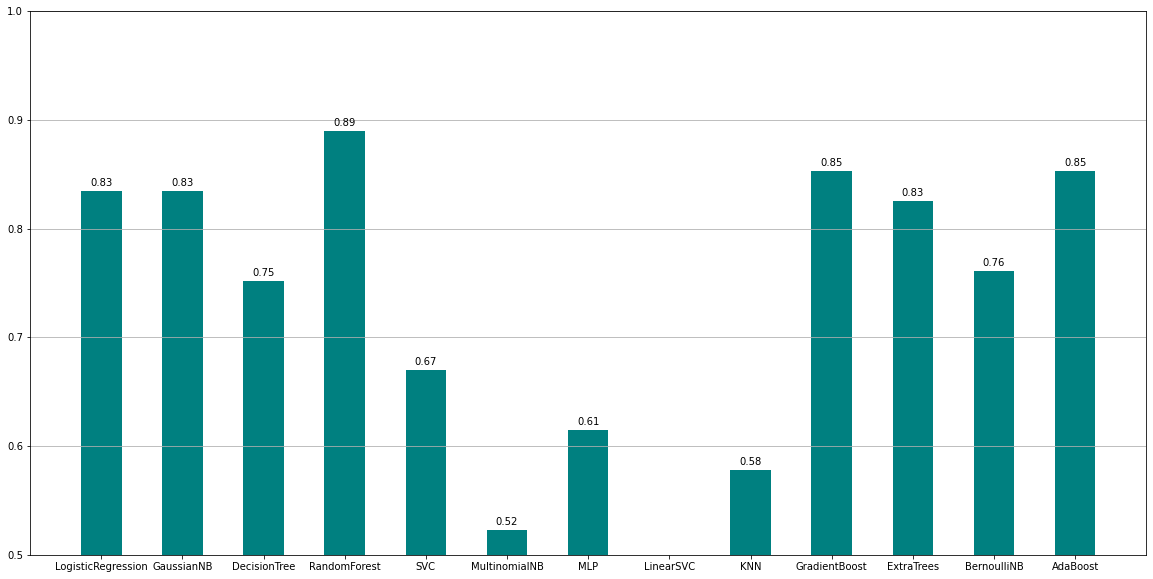

In [137]:
import numpy as np
import matplotlib.pyplot as plt

models = np.array(['LogisticRegression', 'GaussianNB', 'DecisionTree', 'RandomForest', 'SVC', 'MultinomialNB', 'MLP', 'LinearSVC', 'KNN', 'GradientBoost', 'ExtraTrees', 'BernoulliNB', 'AdaBoost'])
accuracy = np.array([LogisticRegression, GaussianNB, DecisionTreeClassifier, RandomForestClassifier, SVC, MultinomialNB, MLPClassifier, LinearSVC, KNN, GradientBoostingClassifier, ExtraTreesClassifier, BernoulliNB, AdaBoostClassifier])

plt.figure(figsize=(20, 10))
bars = plt.bar(models, accuracy, color='teal', width=0.5)
plt.ylim(0.5, 1)
plt.grid(True, axis='y')

# Add data labels (accuracy values) above each bar
for bar, acc in zip(bars, accuracy):
    height = bar.get_height()
    plt.annotate(f'{acc:.2f}',  # Format accuracy to two decimal places
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # Offset label above the bar
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

plt.show()